# Seminar 12

# Introduction to numerical optimization (Y. E. Nesterov Introduction to convex optimization, ch. 1 $\S$ 1.1)

 1. Review of the spring term topics
 2. Problem statement
 3. General scheme of any optimization method
 4. Comparison of optimization methods
 5. Methods to solve one-dimansional minimization problem

## Syllabus of the spring term

Also, see on the [GitHub course page](https://github.com/amkatrutsa/MIPT-Opt#spring-term).

1. Methods to solve **unconstrained** optimization problem
    - One-dimensional optimization problem (**already today!**)
    - Gradient descent
    - Newton method
    - Quasi-Newton methods
    - Conjugate gradient method  
    - Optional:
        - Lerast squares problem
        - Optimal methods and lower bounds
2. Methods to solve **constrained** optimization problem
    - Linear programming
    - Projected gradient method and conditional gradient method
    - Barrier method
    - Penalty function methods
    - Augmented Lagrangian method

## Organizational

1. One seminar and one lecture per week
2. Two problem sets
3. Midterm in the middle of the term
4. Final test at the end of the term
5. Oral exam at the end of the term (grading for a semester is similar to the fall term)
6. Minitests in the deginning of every class
7. Homework assignment almost every week: $\TeX$ or Jupyter Notebook

## Problem statement

\begin{equation}
\begin{split}
& \min_{x \in S} \; f_0(x)\\
\text{s.t. } & f_j(x) = 0, \; j = 1,\ldots,m\\
& g_k(x) \leq 0, \; k = 1,\ldots,p
\end{split}
\end{equation}
where $S \subseteq \mathbb{R}^n$, $f_j: S \rightarrow \mathbb{R}, \; j = 0,\ldots,m$, $g_k: S \rightarrow \mathbb{R}, \; k=1,\ldots,p$

All functions are at least continuous. 

Important fact: **nonlinear** optimization problem in its general form is 

**numerically intractable**!

## Analytical results
- First order necessary condition: 

if $x^*$ is a local minimum point of the differentiable function $f(x)$, then 
$$
f'(x^*) = 0
$$
- Second order necessary condition: 

if $x^*$ is a local minimum point of the twice differentiable function $f(x)$, then 

$$
f'(x^*) = 0 \quad \text{и} \quad f''(x^*) \succeq 0
$$
- Sufficient condition:

Assume $f(x)$ is twice differentiable function and $x^*$ satisfies the following condition

$$
f'(x^*) = 0 \quad f''(x^*) \succ 0,
$$
then $x^*$ is a strict local minimum point of function $f(x)$.

**Remark**: check that you can prove these claims!

## Features of numerical solutions

1. Exact solution of the given problem is impossible due to precision of machine arithmetic
2. It is necessary to define the way to check if current point is a solution or not
3. It is necessary to define what information about the problem is stored

## General iterative scheme

Given: initial guess $x$, required tolerance $\varepsilon$.

```python
def GeneralScheme(x, epsilon):
    
    while StopCriterion(x) > epsilon:
        
        OracleResponse = RequestOracle(x)
        
        UpdateInformation(I, x, OracleResponse)
        
        x = NextPoint(I, x)
        
    return x
```

### Questions
1. What are the possible stopping criteria?
2. What is an oracle and what is it for?
3. What is information model?
4. How to get next point?

#### Stopping criteria
1. Convergence in $x$: 
$$
\| x_k - x^*  \|_2 < \varepsilon
$$ 
2. Convergence in $f$: 
$$
\| f_k - f^* \|_2 < \varepsilon
$$ 
3. Necessary condition 
$$
\| f'(x_k) \|_2 < \varepsilon
$$

But we don't know $x^*$!

Then
$$
\|x_{k+1} - x_k \| = \|x_{k+1} - x_k + x^* - x^* \| \leq \|x_{k+1} - x^* \| + \| x_k - x^* \| \leq 2\varepsilon
$$

The same is true for the convergence in $f$, but sometimes $f^*$ can be estimated!

**Remark**: better practise is to use relative difference in argument and functional, for example $\dfrac{\|x_{k+1} - x_k \|_2}{\| x_k \|_2}$


#### What is oracle?
**Definition**: oracle is some abstact machine that responses on the sequaential method requests

OOP analogy: 

- oracle is a virtual method of the base class
- every problem is derived class
- oracle is defined for every particular problem according to the declaration in the base class

**Black box concept**
1. Iterative method can use only oracle responses
2. Oracle responses are *local*

#### Information about the problem
1. Every oracle response gives **local** information about function behaviour in the given point
2. After aggregation of the oracle responses, we update **global** information about objective function:
    - curvature
    - descent direction
    - etc

#### Compute next point

$$
x_{k+1} = x_{k} + \alpha_k h_k
$$

- **Line search**: fix direction $h_k$ and search for this direction the optimal value of $\alpha_k$
- **Trust region method**: fix appropriate size of *region* in some norm $\| \cdot  \| \leq \alpha$ and *model* of the objective function, which is a good approximation in the considered region.
    Next, we search direction $h_k$, that minimizes the chosen model of the objective function and does not lead to the point $x_k + h_k$ lying outside of the considered region

Questions:
1. How to choose $\alpha_k$?
2. How to choose $h_k$?
3. How to choose model?
4. How to choose region?
5. How to choose region size? 

<span style="color:red">
    In this course we consider only line search methods!</span> 
    
However someiemes the concept of trust region methods will be helpful.

## How to compare optimization methods?
For given class of problems one can compare the following quantities:
1. Complexity
    - analytical: number of the oracle requests to solve the problem with accuracy $\varepsilon$
    - arithmetic: total number of computations to solve the problem with accuracy $\varepsilon$
2. Convergence speed
3. Experiments

### Convergence speed
1. Sublinear
$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$
where $\alpha < 0$ и $ 0 < C < \infty$
2. Linear (geometric progression)
$$
\| x_{k+1} - x^* \|_2 \leq Cq^k, 
$$
where $q \in (0, 1)$ and $ 0 < C < \infty$

3. Superlinear 
$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^p}, 
$$
where $q \in (0, 1)$, $ 0 < C < \infty$ and $p > 1$
4. Quadratic
$$
\| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2, \qquad \text{or} \qquad \| x_{k+1} - x^* \|_2 \leq C q^{2^k}
$$
where $q \in (0, 1)$ and $ 0 < C < \infty$

### Optimal methods: can we do better?
- Authors prove lower bounds of the convergence speed for given set of problems and methods of given order
- Next, the methods, for which these lower bounds are tight, were proposed $\Rightarrow$ optimality is proved
- Later more about convergence theorem

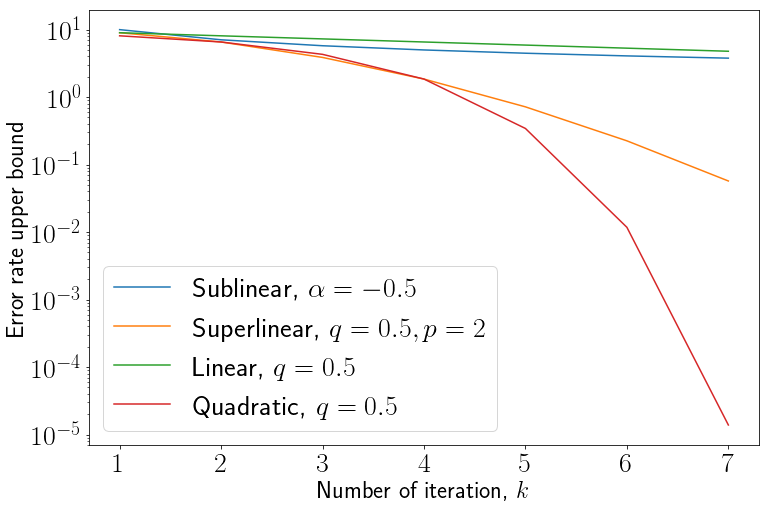

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import numpy as np
C = 10
alpha = -0.5
q = 0.9
num_iter = 7
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(12,8))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$")
plt.semilogy(np.arange(1, num_iter+1), superlinear, 
             label=r"Superlinear, $q = 0.5, p=2$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.5$")
plt.semilogy(np.arange(1, num_iter+1), quadratic, 
             label=r"Quadratic, $q = 0.5$")
plt.xlabel("Number of iteration, $k$", fontsize=24)
plt.ylabel("Error rate upper bound", fontsize=24)
plt.legend(loc="best", fontsize=28)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

### Значение теорем сходимости (Б.Т. Поляк Введение в оптимизацию, гл. 1, $\S$ 6)
1. Что дают теоремы сходимости
     - класс задач, для которых можно рассчитывать на применимость метода (важно не завышать условия!)
         - выпуклость
         - гладкость
     - качественное поведение метода
         - существенно ли начальное приближение
         - по какому функционалу есть сходимость
     - оценку скорости сходимости
         - теоретическая оценка поведения метода без проведения экспериментов
         - определение факторов, которые влияют на сходимость (обусловленность, размерность, etc)
         - иногда заранее можно выбрать число итераций для достижения заданной точности 

2. Что **НЕ** дают теоремы сходимости
    - сходимость метода **ничего не говорит** о целесообразности его применения
    - оценки сходимости зависят от неизвестных констант - неконструктивный характер
    - учёт ошибок округления и точности решения вспомогательных задач
    
**Мораль**: нужно проявлять разумную осторожность 

и здравый смысл!

## Classes of problems
1. Uncontrained optimization
    - Lipschitz objective function 
    - Lipschitz gradient of the objective function
2. Contrained optimization
    - polytope
    - sets with simple structure
    - general form

## Classes of methods
1. Zero order method: oracle returns only objective function $f(x)$

2. Fist order method : oracle returns objective function $f(x)$ and its gradient $f'(x)$

3. Second order method: oracle returns objective function $f(x)$, its gradient $f'(x)$ and its hessian $f''(x)$.

**Q**: do methods of higher order exist?

1. One-step methods 
$$
x_{k+1} = \Phi(x_k)
$$
2. Multi-step methods
$$
x_{k+1} = \Phi(x_k, x_{k-1}, ...)
$$

## One-dimensional optimization
**Definition**. Funtion $f(x)$ is unimodal in interval $[a, b]$, if there exists such point $x^* \in [a, b]$, that 
- $f(x_1) > f(x_2)$ for any $a \leq x_1 < x_2 < x^*$, 

and

- $f(x_1) < f(x_2)$ for any $x^* < x_1 < x_2 \leq b$.

**Q**: what geometry of unimodal function?

### Bisection method

Idea from the first term CS course: divide given interval $[a,b]$ on two equal parts till minimum of the unimodal function is not found

Denite by $N$ the number of computations of function $f$, then one can perform $K = \frac{N - 1}{2}$ iterations and the following estimate holds: 
$$
|x_{K+1} - x^*| \leq \frac{b_{K+1} - a_{K+1}}{2} = \left( \frac{1}{2} \right)^{\frac{N-1}{2}} (b - a) \approx 0.5^{K} (b - a) 
$$

In [2]:
def binary_search(f, a, b, epsilon, callback=None):
    c = (a + b) / 2.0
    while abs(b - a) > epsilon:
#         Check left subsegment
        y = (a + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
#         Check right subsegment
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        if callback is not None:
            callback(a, b)
    return c

In [3]:
def my_callback(a, b, left_bound, right_bound, approximation):
    left_bound.append(a)
    right_bound.append(b)
    approximation.append((a + b) / 2.0)

9.313225746154785e-10


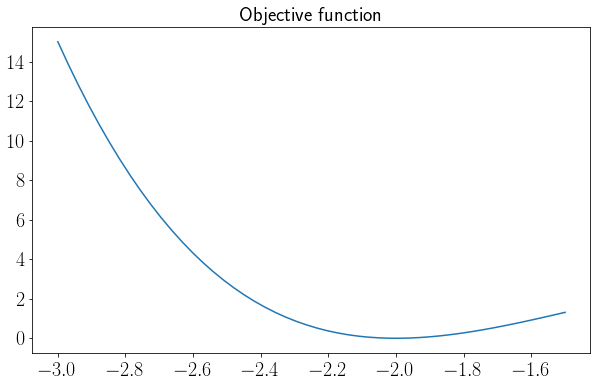

In [4]:
# %matplotlib inline
import numpy as np
# import matplotlib.pyplot as plt

left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

# Target unimodal function on given segment
f = lambda x: (x - 2) * x * (x + 2)**2 # np.power(x+2, 2)
# f = lambda x: -np.sin(x)
x_true = -2
# x_true = np.pi / 2.0
a = -3
b = -1.5
epsilon = 1e-8
x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))
plt.figure(figsize=(10,6))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("Objective function", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

### Golden search method
Idea: divide interval $[a,b]$ not on two eqwual parts, but in the golden ratio.

Estimate convergence speed like in bisection method:
$$
|x_{K+1} - x^*| \leq b_{K+1} - a_{K+1} = \left( \frac{1}{\tau} \right)^{N-1} (b - a) \approx 0.618^K(b-a),
$$
where $\tau = \frac{\sqrt{5} + 1}{2}$.

- Constant of linear convergence is **higher**, than corresponding constant in bisection method
- Number of function calls is **less** than for the bisection method 

In [5]:
def golden_search(f, a, b, tol=1e-5, callback=None):
    tau = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    while b - a > tol:
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        if callback is not None:
            callback(a, b)
    return (a + b) / 2.0

In [6]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(f(x_opt))
print(f(x_gs))
print(np.abs(x_opt - x_true))

6.93889390875399e-18
9.549014390504221e-18
9.313225746154785e-10


### Comparison of the methods for one-dimensional problem

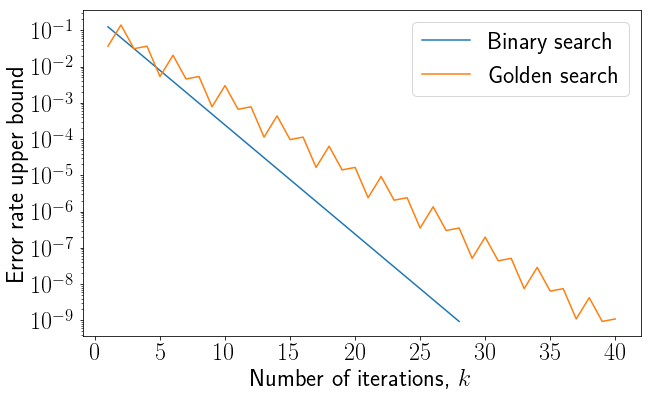

In [7]:
plt.figure(figsize=(10,6))
plt.semilogy(np.arange(1, len(approximation_bs) + 1), np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary search")
plt.semilogy(np.arange(1, len(approximation_gs) + 1), np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden search")
plt.xlabel(r"Number of iterations, $k$", fontsize=24)
plt.ylabel("Error rate upper bound", fontsize=24)
plt.legend(loc="best", fontsize=24)
plt.xticks(fontsize = 24)
_ = plt.yticks(fontsize = 24)

In [8]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

21.1 µs ± 280 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
84.1 µs ± 345 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Example of other behaviour of the considered methods

$$
f(x) = \sin(\sin(\sin(\sqrt{x}))), \; x \in [2, 60]
$$

Text(0.5,1,'Objective function')

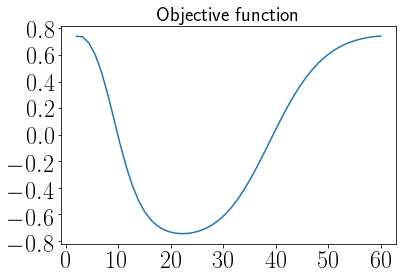

In [9]:
f = lambda x: np.sin(np.sin(np.sin(np.sqrt(x))))
x_true = (3 * np.pi / 2)**2
a = 2
b = 60
epsilon = 1e-8
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.xticks(fontsize = 24)
_ = plt.yticks(fontsize = 24)
plt.title("Objective function", fontsize=20)

## Comparison of convergence speed and execution time

### Bisection method

In [10]:
left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))

2.1968899233115735e-07


### Golden section method

In [11]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(np.abs(x_opt - x_true))

2.1968899233115735e-07


### Convergence

Text(0,0.5,'Error rate upper bound')

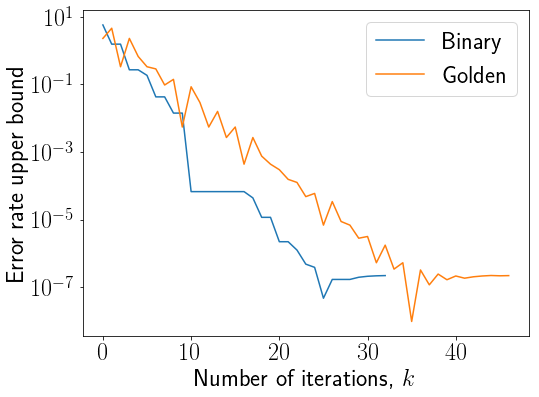

In [12]:
plt.figure(figsize=(8,6))
plt.semilogy(np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary")
plt.semilogy(np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden")
plt.legend(fontsize=24)
plt.xticks(fontsize=24)
_ = plt.yticks(fontsize=24)
plt.xlabel(r"Number of iterations, $k$", fontsize=24)
plt.ylabel("Error rate upper bound", fontsize=24)

### Execution time

In [13]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

461 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
436 µs ± 3.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Recap
1. Introduction to numerical optimization
2. General scheme of any optimization method 
3. How to compare optimization methods
4. Zoo of the optimization methods and problems
5. One-dimensional minimization